## **What is Seaborn?**
- Seaborn is a data visualization library based on Matplotlib.
- It provides a high-level interface for drawing attractive and statistically informative graphics.
- Why Seaborn?
    - Beautiful Defaults: Seaborn plots look much better out-of-the-box than default Matplotlib plots.
    - Pandas Integration: It is designed to work seamlessly with Pandas DataFrames. You often just specify the DataFrame and the column names for your x and y axes.
    - Statistical Focus: It excels at creating plots that are inherently statistical, like showing distributions, relationships with regression lines, and categorical data comparisons.
    - Less Code: You can create complex plots (like a bar chart with confidence intervals) with a single line of code.

**The Relationship:** Seaborn creates plots on top of Matplotlib Axes. This means you can use Seaborn for a quick, beautiful plot, and then use your Matplotlib skills (ax.set_title(), ax.set_xlabel(), etc.) to customize it further.

**Seaborn Plots:**

| **Plot**         | **Use Case / Best For**                               | **Type of Variables**                | **When to Use**                                            | **Function**        |
| ---------------- | ----------------------------------------------------- | ------------------------------------ | ---------------------------------------------------------- | ------------------- |
| **Histogram**    | Visualizing distribution of a single numeric variable | Numerical (Univariate)               | To check shape, skewness, outliers, bins                   | `sns.histplot()`    |
| **KDE Plot**     | Smooth distribution estimation (density curve)        | Numerical (Univariate)               | For understanding probability distribution shape           | `sns.kdeplot()`     |
| **Box Plot**     | Summary of distribution with outliers, medians        | Categorical vs Numerical             | To compare distributions across categories                 | `sns.boxplot()`     |
| **Violin Plot**  | KDE + Boxplot hybrid                                  | Categorical vs Numerical             | When you want to show distribution + density per category  | `sns.violinplot()`  |
| **Strip Plot**   | Raw data points along an axis                         | Categorical vs Numerical             | Small datasets to see all values                           | `sns.stripplot()`   |
| **Swarm Plot**   | Non-overlapping strip plot                            | Categorical vs Numerical             | Better visualization of individual points (avoids overlap) | `sns.swarmplot()`   |
| **Bar Plot**     | Mean (or other estimator) per category                | Categorical vs Numerical             | When you want to compare mean/avg of groups                | `sns.barplot()`     |
| **Count Plot**   | Count of observations per category                    | Categorical                          | Count frequency for categories                             | `sns.countplot()`   |
| **Point Plot**   | Line + points showing central tendency                | Categorical vs Numerical             | Track changes across categories (with error bars)          | `sns.pointplot()`   |
| **Line Plot**    | Trend over continuous variable (e.g., time)           | Numerical vs Numerical               | Use for time-series or trend analysis                      | `sns.lineplot()`    |
| **Scatter Plot** | Relationship between two numeric variables            | Numerical vs Numerical               | Visualizing correlation, clusters, outliers                | `sns.scatterplot()` |
| **Reg Plot**     | Scatter plot + regression line                        | Numerical vs Numerical               | When you want to visualize linear regression               | `sns.regplot()`     |
| **LM Plot**      | Reg plot with additional grouping (facet)             | Numerical vs Numerical               | Regression by category                                     | `sns.lmplot()`      |
| **Pair Plot**    | Matrix of scatter plots for all pairwise variables    | Multivariate Numerical               | Quick overview of relationships between multiple variables | `sns.pairplot()`    |
| **Joint Plot**   | Scatter + histogram + KDE                             | Numerical vs Numerical               | In-depth view of two variables + marginal distributions    | `sns.jointplot()`   |
| **Heatmap**      | 2D correlation or matrix                              | Categorical vs Categorical / Numeric | Show correlations or pivot tables                          | `sns.heatmap()`     |
| **Clustermap**   | Heatmap + hierarchical clustering                     | Matrix Data                          | Cluster similarity in data (unsupervised learning prep)    | `sns.clustermap()`  |
| **FacetGrid**    | Multi-plot grid by category                           | Any mix                              | Best for faceting same plot over multiple categories       | `sns.FacetGrid()`   |
| **CatPlot**      | Wrapper for box, violin, swarm, strip, etc.           | Categorical plots                    | Simplifies categorical plots with facets                   | `sns.catplot()`     |
| **Boxen Plot**   | Better box plot for large datasets                    | Categorical vs Numerical             | Useful for large data with many outliers                   | `sns.boxenplot()`   |
| **ECDF Plot**    | Empirical cumulative distribution                     | Numerical                            | Cumulative % vs values (like a step graph)                 | `sns.ecdfplot()`    |


In [1]:
# In your 3.2.1_seaborn_deep_dive.ipynb notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's set a default style for all plots
sns.set_theme(style="ticks", palette="pastel")

# Load datasets
tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")

print("Tips Dataset Head:")
display(tips.head()) # display() is a nice Jupyter function for DataFrames

print("\nTitanic Dataset Head:")
display(titanic.head())

Tips Dataset Head:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



Titanic Dataset Head:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Topic 1: Seaborn's Relationship with Matplotlib**
As we discussed, Seaborn sits on top of Matplotlib. Seaborn functions create plots on a Matplotlib Axes object. You can always "drop down" to Matplotlib to customize a Seaborn plot.

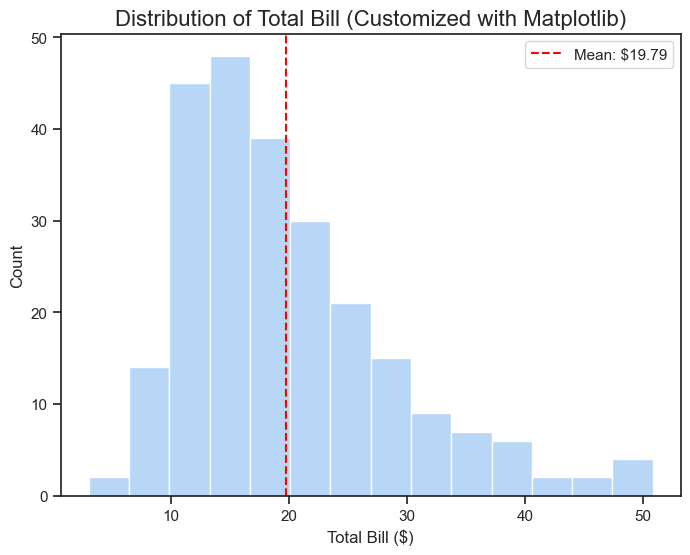

In [2]:
# Create a plot using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=tips, x="total_bill", ax=ax)

# Now, use Matplotlib methods to customize it further
ax.set_title("Distribution of Total Bill (Customized with Matplotlib)", fontsize=16)
ax.set_xlabel("Total Bill ($)", fontsize=12)
ax.axvline(tips['total_bill'].mean(), color='red', linestyle='--', label=f"Mean: ${tips['total_bill'].mean():.2f}")
# axvline() is a Matplotlib function used to add a vertical line across an Axes (plot area).

ax.legend()

plt.show()

## **Topic 2: Plotting Statistical Relationships**
These plots show the relationship between two numerical variables.
- **scatterplot:** The most fundamental.
- **lineplot:** Best for showing the change of a variable over continuous data (like time).
- **relplot (Relational Plot):** A figure-level function that is the "master" of scatterplot and lineplot. It allows you to create subplots (facets) based on other categorical variables.

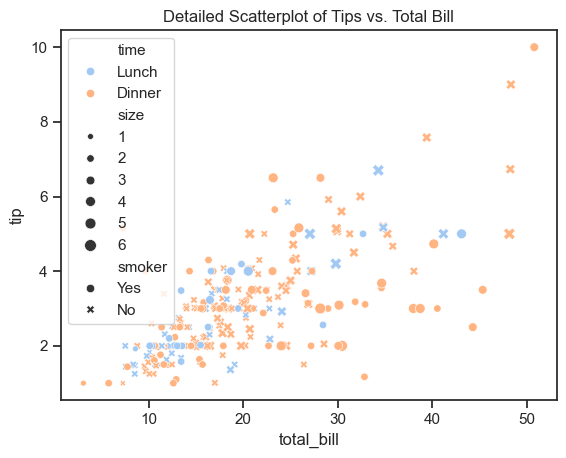

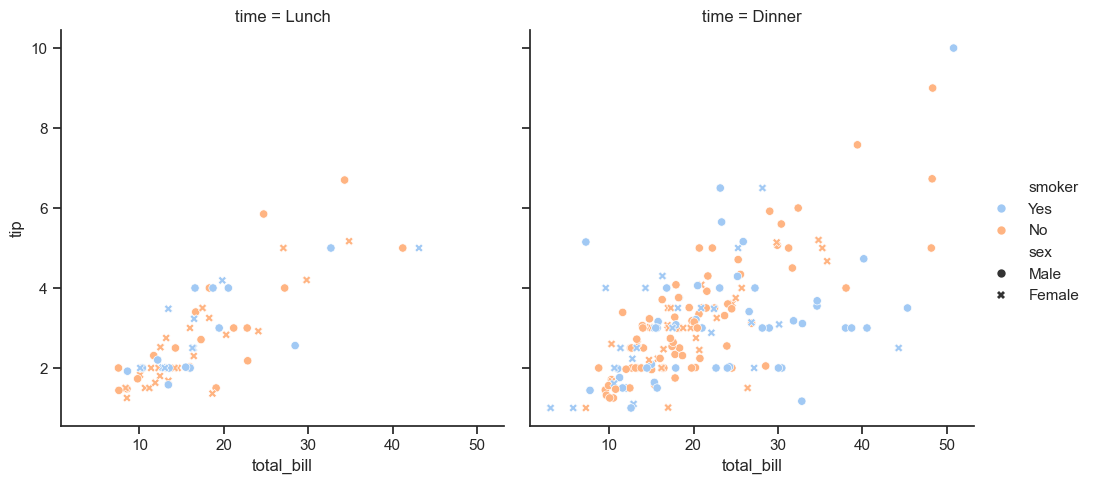

In [3]:
# A more advanced scatterplot using hue, size, and style
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="smoker", size="size")
plt.title("Detailed Scatterplot of Tips vs. Total Bill")
plt.show()

# relplot is more powerful because it can create subplots (faceting)
# This creates two plots side-by-side, one for Lunch and one for Dinner.
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="sex", col="time", kind="scatter")
plt.show()

## **Topic 3: Visualizing Distributions**
These plots show how a single numerical variable is distributed.
- **histplot:** The familiar histogram.
- **kdeplot (Kernel Density Estimate):** A smoothed version of the histogram.
- **ecdfplot (Empirical Cumulative Distribution Function):** Shows the proportion of data points less than or equal to a given value. Very useful for statistical comparisons.
- **rugplot:** Draws small vertical ticks at each data point. Often used to supplement another plot.
- **displot (Distribution Plot):** A figure-level function that is the "master" of all distribution plots. It can create histograms, KDEs, ECDFs, and facet them.

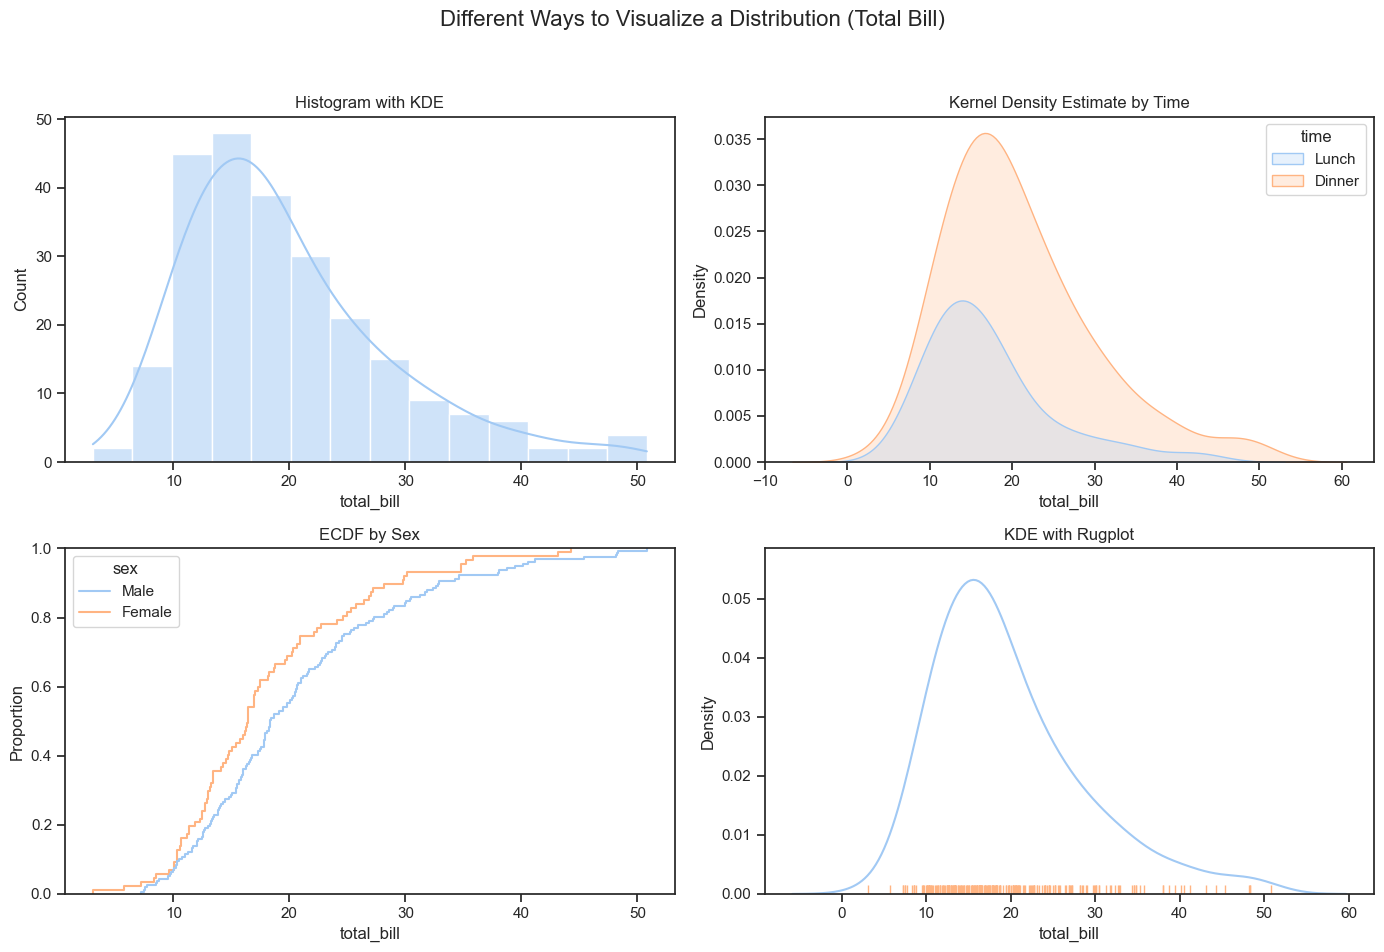

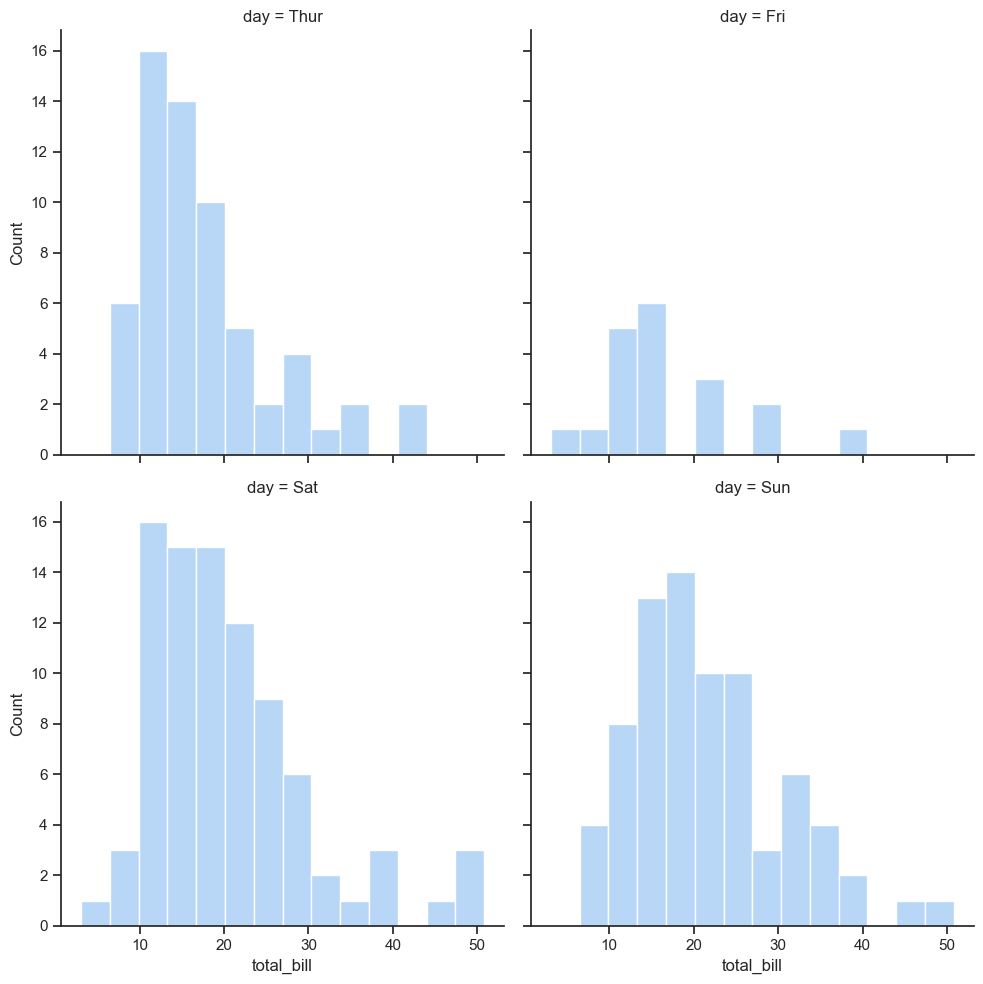

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Different Ways to Visualize a Distribution (Total Bill)", fontsize=16)

# histplot
sns.histplot(data=tips, x="total_bill", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram with KDE")

# kdeplot
sns.kdeplot(data=tips, x="total_bill", hue="time", fill=True, ax=axes[0, 1])
axes[0, 1].set_title("Kernel Density Estimate by Time")

# ecdfplot
sns.ecdfplot(data=tips, x="total_bill", hue="sex", ax=axes[1, 0])
axes[1, 0].set_title("ECDF by Sex")

# rugplot (often used with another plot)
sns.kdeplot(data=tips, x="total_bill", ax=axes[1, 1])
sns.rugplot(data=tips, x="total_bill", ax=axes[1, 1])
axes[1, 1].set_title("KDE with Rugplot")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Using displot to create faceted histograms
sns.displot(data=tips, x="total_bill", col="day", kind="hist", col_wrap=2)
plt.show()

## **Topic 4: Plotting Categorical Data**
These plots involve at least one categorical variable.
- Categorical Scatterplots:
    - **stripplot:** A simple scatter plot for a categorical variable. Can have overlapping points.
    - **swarmplot:** Similar to stripplot, but adjusts points to avoid overlap. Does not scale well to large datasets.
- Categorical Distribution Plots:
    - **boxplot:** The classic box-and-whisker.
    - **violinplot:** Boxplot combined with a KDE.
- Categorical Estimate Plots:
    - **barplot:** Shows a point estimate (mean) and a confidence interval (the black lines).
    - **pointplot:** Similar to a bar plot, but only shows the point estimate and confidence interval. Good for comparing slopes between categories.
- **catplot (Categorical Plot):** A figure-level function that is the "master" of all these plots and allows for faceting.

F:\Python for Data science\python_ds_mastery_journey\module_0_setup\venv_ds\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


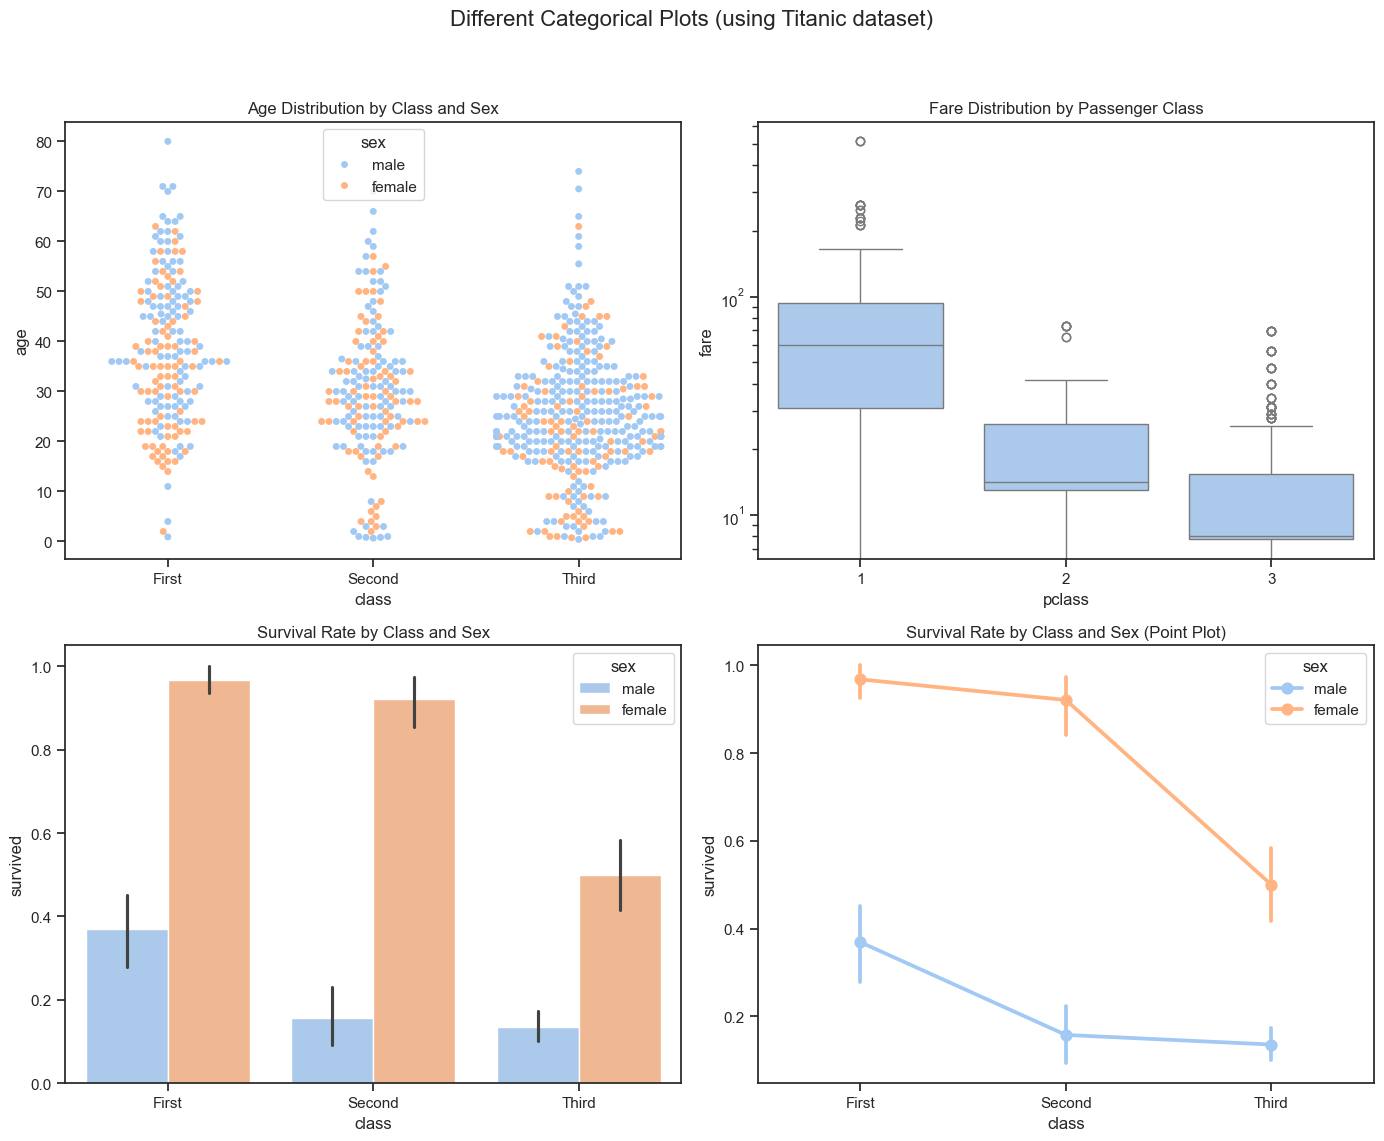

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Different Categorical Plots (using Titanic dataset)", fontsize=16)

# Swarmplot
sns.swarmplot(data=titanic, x="class", y="age", hue="sex", ax=axes[0,0])
axes[0,0].set_title("Age Distribution by Class and Sex")

# Boxplot
sns.boxplot(data=titanic, x="pclass", y="fare", ax=axes[0,1])
axes[0,1].set_title("Fare Distribution by Passenger Class")
axes[0,1].set_yscale('log') # Use log scale for skewed data like fare

# Barplot
sns.barplot(data=titanic, x="class", y="survived", hue="sex", ax=axes[1,0])
axes[1,0].set_title("Survival Rate by Class and Sex")

# Pointplot
sns.pointplot(data=titanic, x="class", y="survived", hue="sex", ax=axes[1,1])
axes[1,1].set_title("Survival Rate by Class and Sex (Point Plot)")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

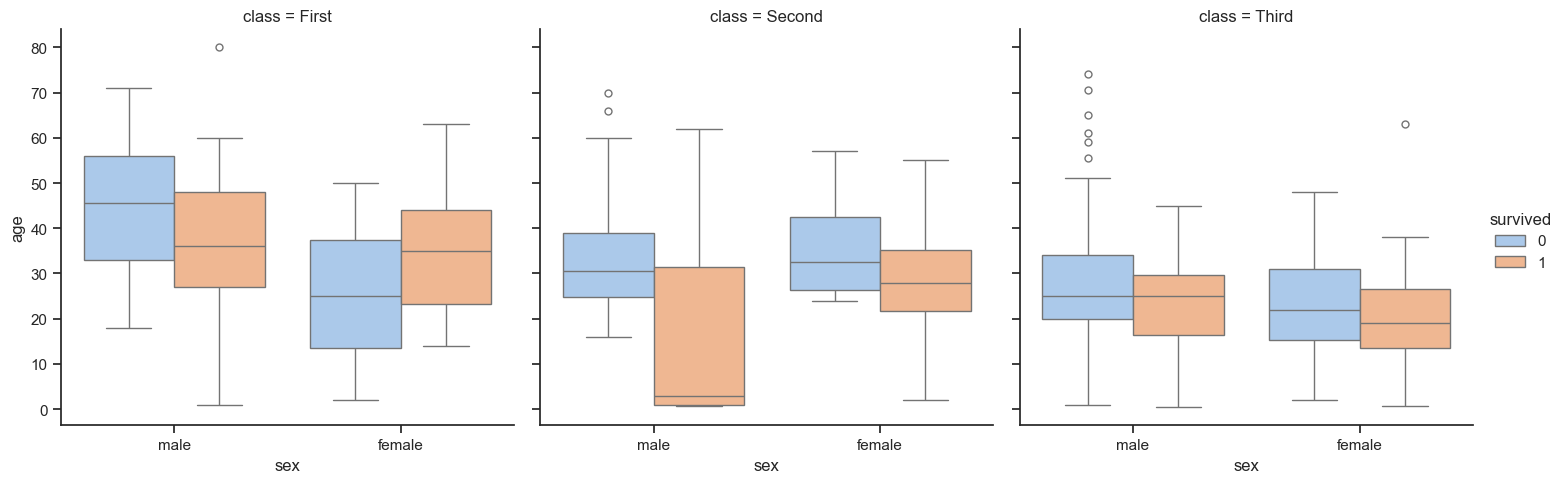

In [6]:
# Using catplot to create faceted boxplots
sns.catplot(data=titanic, x="sex", y="age", hue="survived", col="class", kind="box")
plt.show()

## **Exercises**

**1. Relationship between Tip and Party Size:**
- Create a scatterplot to visualize the relationship between the size of the party and the tip amount.
- Use the hue parameter to also show how this relationship differs for smoker vs. non-smoker.
- Using your Matplotlib skills, give the plot a clear title and axis labels.

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


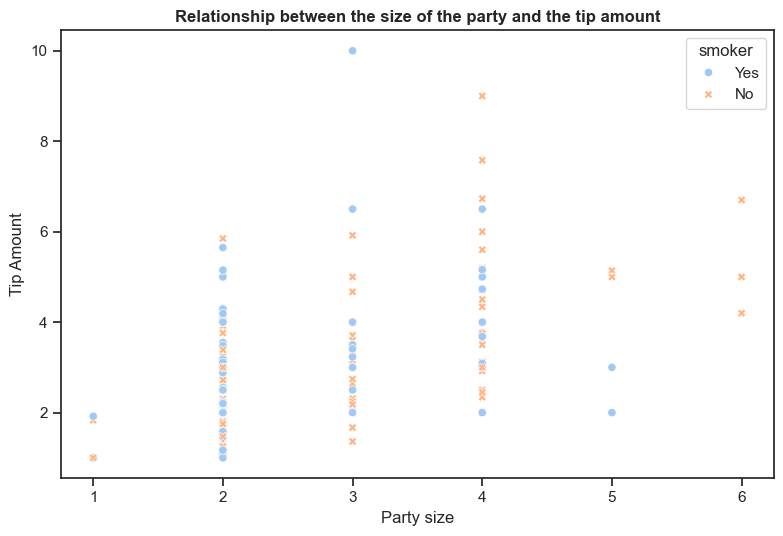

In [3]:
fig, ax= plt.subplots(figsize=(8,6))
sns.scatterplot(data=tips, x='size', y='tip', hue='smoker',style='smoker', ax=ax)


ax.set_title('Relationship between the size of the party and the tip amount', fontweight ='bold')
ax.set_xlabel("Party size")
ax.set_ylabel("Tip Amount")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**2. Categorical Bill Distribution:**
- Create a boxplot that shows the distribution of total_bill for each day of the week.
- Now, create a violinplot that shows the same information (x="day", y="total_bill").
- In a Markdown cell, briefly explain what the violin plot shows that the boxplot doesn't.

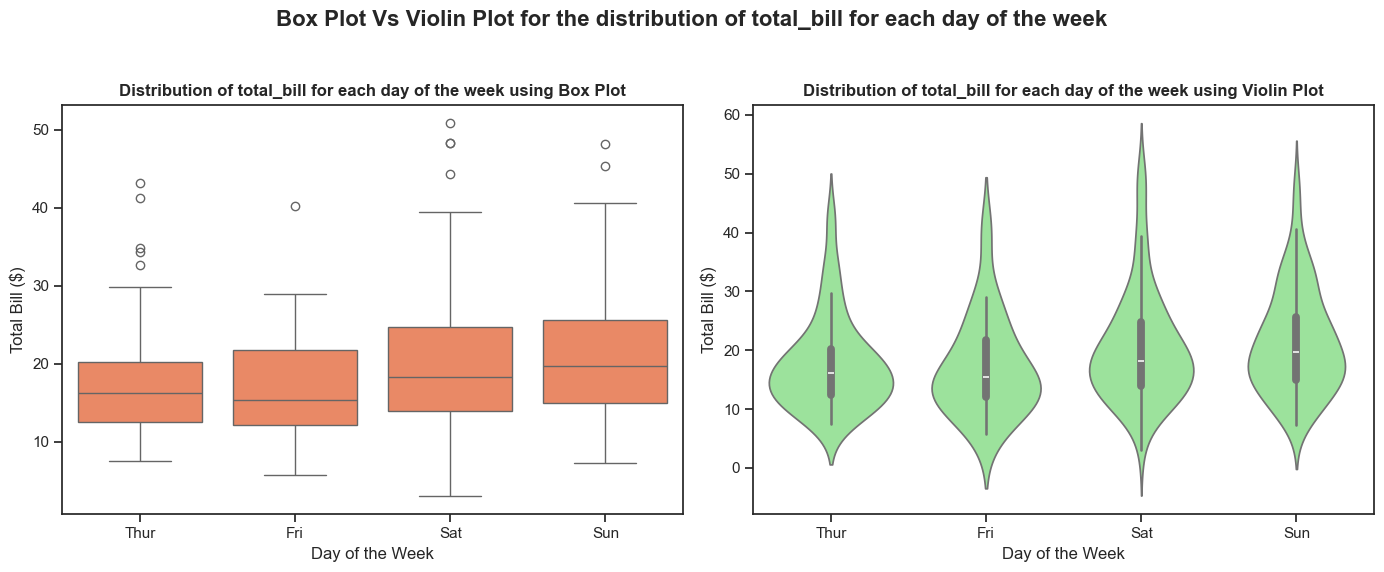

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
sns.boxplot(data=tips, x='day', y='total_bill', color='coral', ax=axes[0])
axes[0].set_title("Distribution of total_bill for each day of the week using Box Plot", fontweight='bold')
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Total Bill ($)")

#Violin plot
sns.violinplot(data=tips,x='day', y='total_bill', color='lightgreen', ax=axes[1])
axes[1].set_title("Distribution of total_bill for each day of the week using Violin Plot", fontweight='bold')
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Total Bill ($)")

plt.suptitle("Box Plot Vs Violin Plot for the distribution of total_bill for each day of the week", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The violin plot not only includes all the summary statistics that a box plot shows (like median, quartiles, and outliers), but also adds a kernel density estimate (KDE) of the distribution. This KDE allows us to see the shape of the distribution, including:
- Whether the data is bimodal or skewed
- The density or frequency of observations at different value ranges
- If there are multiple peaks or heavy concentrations at certain values
In contrast, the box plot summarizes data more compactly but hides the underlying distribution shape. So while a box plot is great for quick comparison of spread and medians, the violin plot provides deeper insight into the distribution’s nuances.

### 🔍 How to Read a Violin Plot —

A **violin plot** is like a combination of a **box plot** and a **mirror-shaped density curve**. Here’s what you can learn from it:

---

✅ **1. Median (Middle Value):**  
There is a **white dot or line** in the center of the "violin" — that's the **median**.  
It tells you the **middle value** of the total bills for that day.

---

✅ **2. Quartiles (Q1 and Q3):**  
Around the white dot (median), there’s often a **black bar or thick area**.  
The **top and bottom of this bar** represent:  
- **Q1 (25th percentile)** — lower edge of the bar  
- **Q3 (75th percentile)** — upper edge of the bar  

This thick part is called the **Interquartile Range (IQR)** — it contains the **middle 50% of the data**.

---

✅ **3. Outliers:**  
Violin plots **don’t always show outliers directly** (like dots outside whiskers in boxplots).  
But you might **guess outliers** if the tails (top or bottom parts) are **very narrow and stretched**.  
> ⚠️ To see outliers clearly, box plots are better.

---

✅ **4. KDE (Distribution Shape):**  
The **width of the violin** at any point shows how **many values** are there.  

- **Wider part = more data** at that value  
- **Narrow part = fewer data points** at that value  

**Example:**  
If the bottom of the violin is **wide near $15**, many bills are around $15.  
If it's **thin at $30**, few bills are around $30.

---

### 📌 Summary:

| What You See in Violin Plot | What It Tells You                        |
|-----------------------------|------------------------------------------|
| White dot or line           | Median (middle value)                    |
| Thick vertical bar          | Quartiles (25% to 75% range)             |
| Shape of violin             | KDE: how the values are spread           |
| Width at a point            | Density (how common that bill value is)  |
| Thin stretched tail         | Possible outliers (not exact)            |


**3. Bar Plot for Average Tip:**
- Create a barplot to show the average tip amount for each day.
- Use the hue parameter to further break this down by time (Lunch/Dinner).
- What do the small black lines on top of the bars represent? (Hint: It's a statistical measure of -  uncertainty. Look up the barplot documentation or take a guess). Add your answer in a Markdown cell.

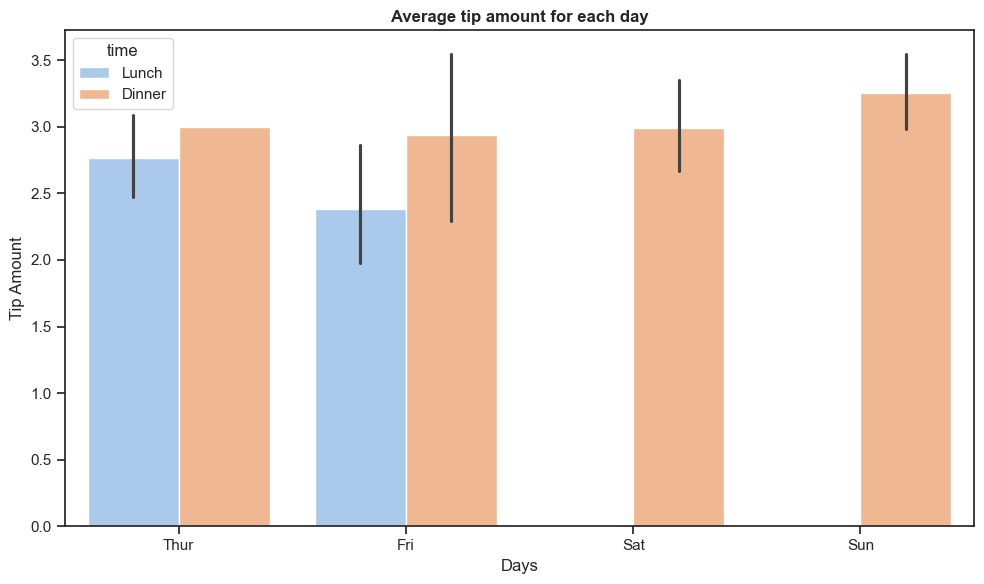

In [7]:
fig, ax=plt.subplots(figsize=(10, 6))
sns.barplot(data=tips, x="day", y="tip", hue="time", ax=ax)
ax.set_title("Average tip amount for each day", fontweight="bold")
ax.set_xlabel("Days")
ax.set_ylabel("Tip Amount")

plt.tight_layout()
plt.show()

The small black lines on top of the bars are **error bars**, which represent the **confidence interval (CI)** for the mean tip value.

By default, `sns.barplot()` shows a **95% confidence interval**, which means:
> There's a 95% chance the true average tip value lies within this range.

These lines give an idea of the **uncertainty** or **variability** in the mean —  
**shorter lines** mean more confidence in the average,  
**longer lines** mean the data is more spread out or variable.

You can change or remove them using the `ci` parameter in `sns.barplot()`, for example:
```python
sns.barplot(data=tips, x="day", y="tip", hue="time", ci=None)


**4. Correlation Heatmap:**
- A heatmap is a great way to visualize correlations between numerical variables.
- First, select only the numerical columns from tips_df. (e.g., numerical_df = tips_df[['total_bill', 'tip', 'size']]).
- Next, calculate the correlation matrix using .corr(): corr_matrix = numerical_df.corr().
- Finally, use sns.heatmap() to visualize this corr_matrix.
- For a better heatmap, use these parameters: sns.heatmap(corr_matrix, annot=True, cmap='coolwarm'). annot=True writes the data values on the squares, and cmap sets the color scheme.

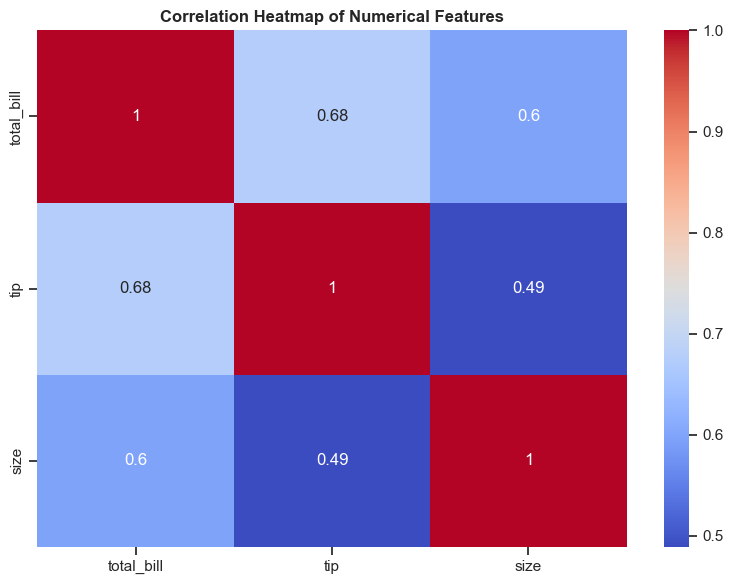

In [8]:
numerical_df = tips[['total_bill', 'tip', 'size']]
corr_matrix = numerical_df.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Heatmap of Numerical Features", fontweight='bold')

plt.tight_layout()
plt.show()

**🔍 Correlation Heatmap: What It Tells Us**

A **correlation heatmap** helps us visualize the **relationship strength** between pairs of numerical variables.

- The numbers inside the boxes are **correlation coefficients**, ranging from **-1 to +1**:
  - **+1** = Perfect positive correlation (both increase together)
  - **-1** = Perfect negative correlation (one increases, the other decreases)
  - **0** = No linear correlation

- **Color meaning (cmap='coolwarm')**:
  - **Red shades** → Positive correlation
  - **Blue shades** → Negative correlation
  - **White/light colors** → Weak or no correlation

✅ From this heatmap, you can quickly see:
- If **`total_bill`** and **`tip`** are strongly correlated.
- Whether **`size`** has any relationship with the tip amount.

## **Mini-Project: Exploratory Data Analysis (EDA) on the Titanic Dataset**

**Goal:**  
Perform a full EDA on the titanic dataset. Your goal is to explore the data, find patterns, and answer key questions using visualizations.

---

### Structure your EDA:

---

### 🔍 Initial Inspection:
- Use `.info()`, `.describe()`, and `.isnull().sum()` to get a first look at the data.  
- In a Markdown cell, write down your initial observations (e.g.,  
  *"Age and deck have many missing values,"*  
  *"Fare is highly skewed."*)

---

### 📊 Univariate Analysis (Analyzing Single Variables):
- Create a **countplot** for the `survived` column.  
- Create a **countplot** for the `pclass` (Passenger Class) column.  
- Create a **histplot** for the `age` column.  
  - What do you observe about the age distribution?

---

### 📈 Bivariate Analysis (Analyzing Relationships Between Two Variables):
- Use a **barplot** to explore the relationship between `pclass` and `survived`.  
  - Does passenger class seem to affect survival rate?

- Use a **barplot** to explore the relationship between `sex` and `survived`.

- Use a **boxplot** to see the distribution of `age` for those who survived vs. those who did not.

- Use **FacetGrid** or **lmplot** to look at the relationship between `age`, `sex`, and `survived`.

---

### 🔬 Multivariate Analysis (Analyzing More Than Two Variables):
- Create a **heatmap** of the correlation matrix for the numerical columns:  
  `survived`, `pclass`, `age`, `sibsp`, `parch`, `fare`  
  - What are the strongest correlations?

- Use a **catplot** (e.g., `kind="bar"`) to explore the relationship between `pclass`, `sex`, and `survived` all in one visualization.

---

### ✅ Summary of Findings:
In a final Markdown cell, write a few bullet points summarizing your key findings from the EDA. For example:  
- "Survival was significantly higher for females than males"  
- "Passengers in first class had a much higher survival rate"  
- etc.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 🔍 Initial Inspection

- The dataset contains **891 rows** and **15 core columns** (plus additional engineered columns).
- The following columns have **missing values**:
  - `age`: 177 missing
  - `embarked`: 2 missing
  - `deck`: many missing values
  - `embark_town`: 2 missing

- The `fare` column is **highly right-skewed**:
  - Mean = 32.20, Median (50%) = 14.45
  - Max fare = 512.33, which is much higher than the 75th percentile (31.0)
  - This indicates presence of **extreme outliers**

- `age` also shows some right-skewness and has missing values.
- The dataset is moderately clean but requires:
  - Handling missing values (especially in `age` and `deck`)
  - Potential transformation of skewed features like `fare`


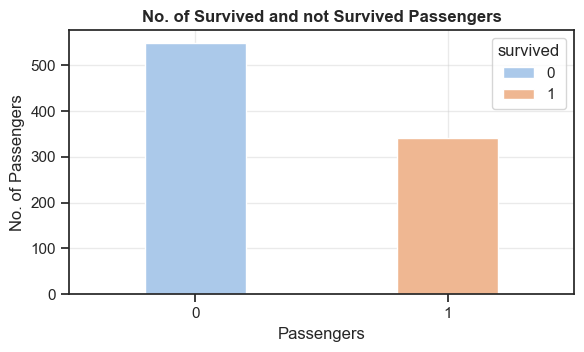

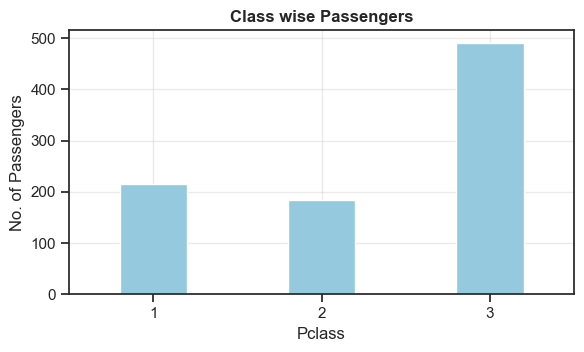

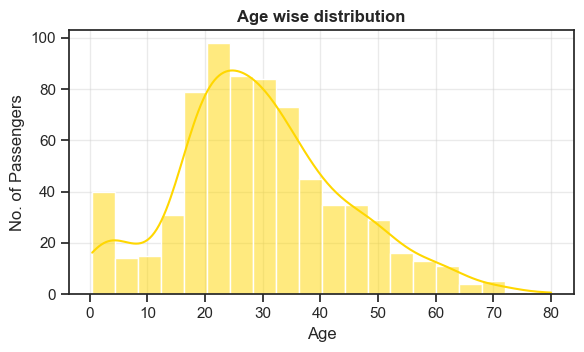

In [42]:
# Count plot for survived
fig, ax=plt.subplots(figsize=(6, 4))
sns.countplot(data=titanic, x="survived", hue="survived", width=0.4, ax=ax)
ax.set_title("No. of Survived and not Survived Passengers", fontweight="bold")
ax.set_xlabel("Passengers")
ax.set_ylabel("No. of Passengers")
ax.grid(True, alpha= 0.4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Count plot for pclass
fig, ax=plt.subplots(figsize=(6, 4))
sns.countplot(data=titanic, x="pclass", width=0.4, color="skyblue", ax=ax)
ax.set_title("Class wise Passengers", fontweight="bold")
ax.set_xlabel("Pclass")
ax.set_ylabel("No. of Passengers")
ax.grid(True, alpha= 0.4)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Hist plot for Age
fig, ax=plt.subplots(figsize=(6, 4))
sns.histplot(data=titanic, x="age", color="gold", kde=True, ax=ax)
ax.set_title("Age wise distribution", fontweight="bold")
ax.set_xlabel("Age")
ax.set_ylabel("No. of Passengers")
ax.grid(True, alpha= 0.4)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 📊 Univariate Analysis (Analyzing Single Variables)

#### 1. Countplot for `survived`:
- Shows how many passengers **survived (1)** and **did not survive (0)**.
- Clearly, more passengers did **not survive** than those who did.

#### 2. Countplot for `pclass` (Passenger Class):
- Most passengers were in **3rd class**, followed by 1st and 2nd class.
- This gives us an idea of class distribution on the ship.

#### 3. Histplot for `age`:
- The age distribution is **right-skewed**.
- Majority of the passengers were between **20 and 40 years old**.
- The KDE line confirms the **peak is around mid-20s**.
- There are fewer very young (below 10) and older (above 60) passengers.

📌 These insights will help us understand who was on board and how age/class may relate to survival in further analysis.

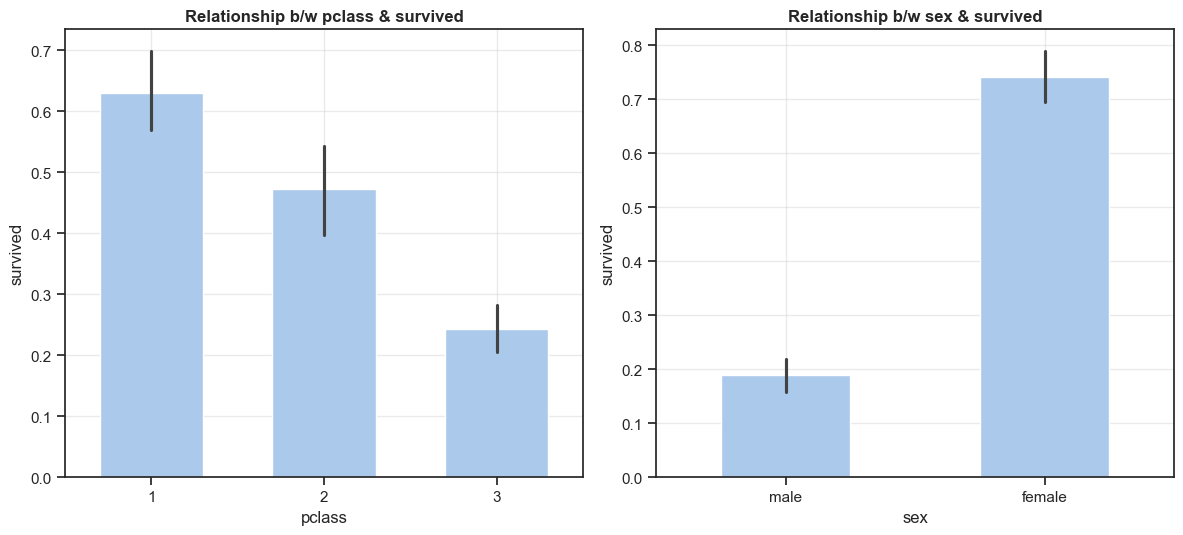

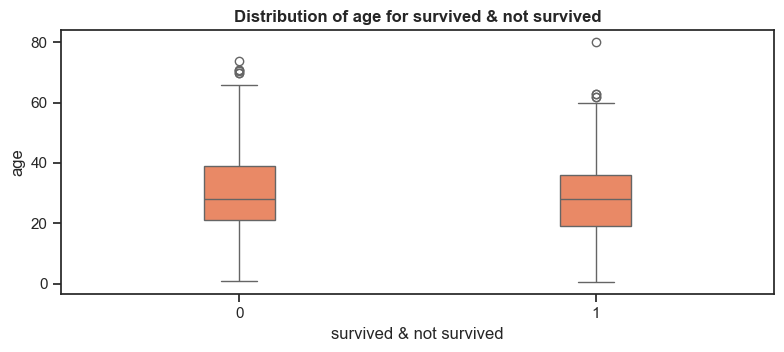

In [73]:
fig, axes=plt.subplots(1, 2, figsize=(12,6))

# Bar plot
sns.barplot(data=titanic, x="pclass", y="survived", width=0.6, ax=axes[0])
axes[0].set_title("Relationship b/w pclass & survived", fontweight="bold")
axes[0].grid(True, alpha=0.4)

sns.barplot(data=titanic, x="sex", y="survived", width=0.5, ax=axes[1])
axes[1].set_title("Relationship b/w sex & survived", fontweight="bold")
axes[1].grid(True, alpha=0.4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box plot
fig, ax=plt.subplots(figsize=(8,4))
sns.boxplot(data=titanic, x="survived", y="age", color="coral", width=0.2, ax=ax)
ax.set_title("Distribution of age for survived & not survived", fontweight="bold")
ax.set_xlabel("survived & not survived")
ax.set_ylabel("age")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

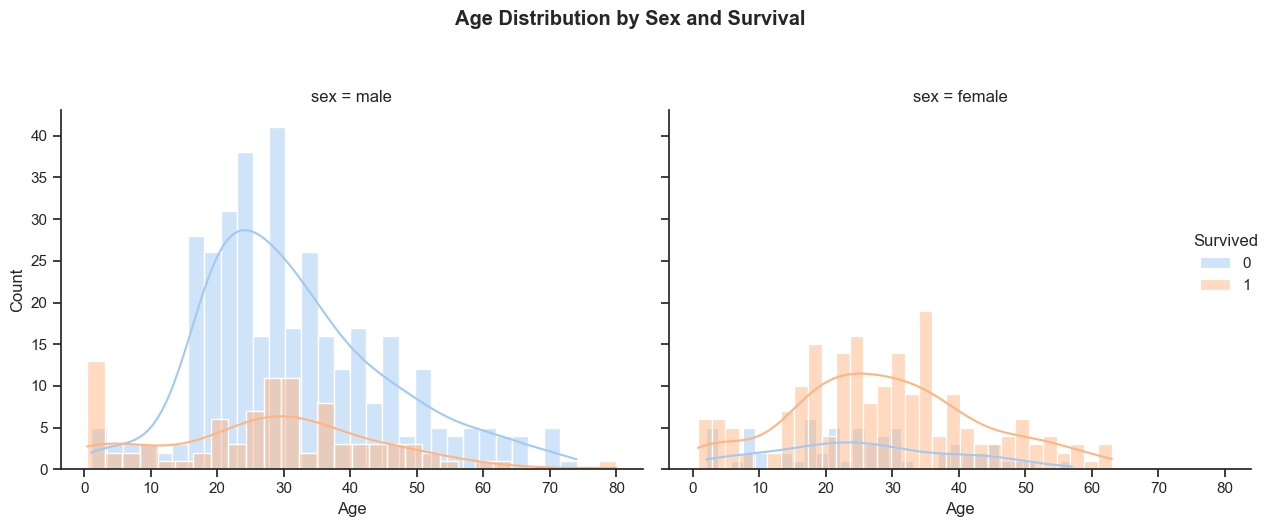

In [88]:
# Create the FacetGrid
g = sns.FacetGrid(titanic, col="sex", hue="survived", height=5, aspect=1.2)
g.map(sns.histplot, "age", kde=True, bins=30, alpha=0.5)
g.add_legend(title="Survived")
g.set_axis_labels("Age", "Count")
g.fig.suptitle("Age Distribution by Sex and Survival", y=1.05, fontweight='bold')
plt.tight_layout()
plt.show()


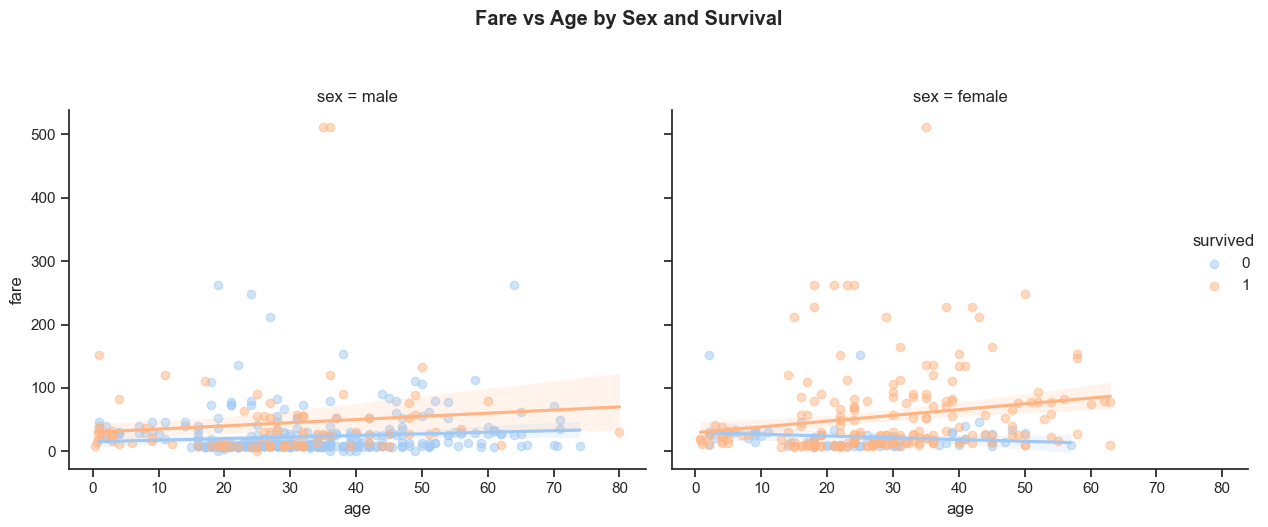

In [89]:
sns.lmplot(data=titanic, x="age", y="fare", col="sex", hue="survived",  height=5, aspect=1.2,
           scatter_kws={"alpha": 0.5})

plt.suptitle("Fare vs Age by Sex and Survival", y=1.05, fontweight='bold')
plt.tight_layout()
plt.show()

### 🔍 Bivariate Analysis Insights

- **Pclass vs Survived**  
  ✅ Passengers in **1st class** had the **highest survival rate**, while **3rd class** had the **lowest**.

- **Sex vs Survived**  
  ✅ **Females** had a **much higher survival rate** than males — around 75% of females survived.

- **Age vs Survived (Boxplot)**  
  ✅ **Survivors** were generally **younger** than non-survivors, but the difference is moderate.

- **Age Distribution by Sex and Survived (FacetGrid)**  
  ✅ **Young males** and **middle-aged females** survived more. Survival patterns differ by gender.

- **Fare vs Age by Sex and Survived (lmplot)**  
  ✅ **Higher fares** are associated with **better survival chances**, especially for **females**.

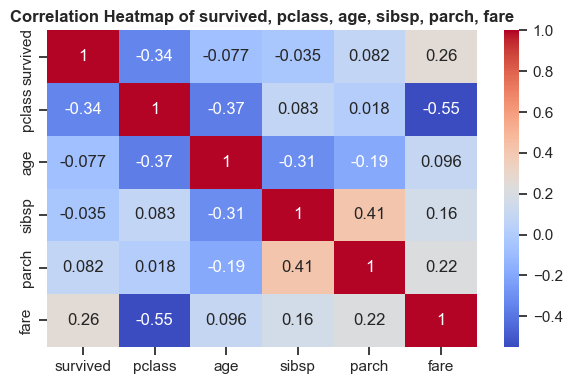

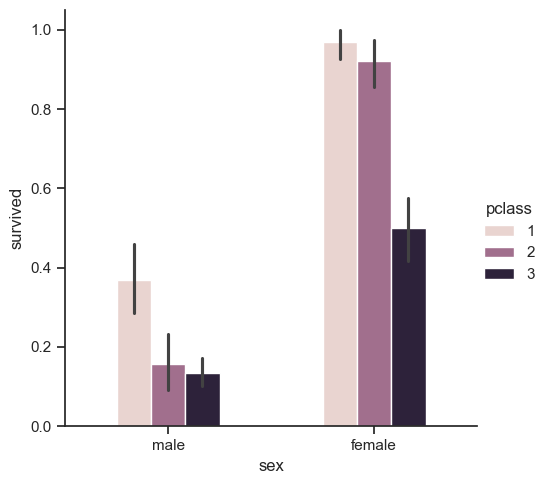

In [101]:
# Heatmap
numerical_df = titanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]
corr_matrix = numerical_df.corr()

fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Heatmap of survived, pclass, age, sibsp, parch, fare", fontweight='bold')

plt.tight_layout()
plt.show()

# Catplot
sns.catplot(data=titanic, x="sex", y="survived", hue="pclass", kind="bar", width=0.5)
plt.show()

**Key Insights 📊**
> Gender is a primary factor for survival. Across all passenger classes, females had a significantly higher survival rate than males. This is most evident in First and Second Class, where the survival rate for females was over 90%.

> Passenger class strongly correlates with survival. The heatmap shows a notable negative correlation between pclass and survived (−0.34). The bar charts confirm this: survival rates drop significantly from First Class to Third Class for both genders.

> Economic status played a role. Fare is positively correlated with survival (0.26) and negatively correlated with pclass (−0.55). This suggests that wealthier passengers, who could afford higher-class tickets, had a greater chance of surviving.

## 🧾 Summary of Findings from Titanic EDA

- 🚺 **Females had a significantly higher survival rate** than males — especially in First and Second Class.
- 🛳️ **Passengers in First Class had the highest survival rate**, while those in Third Class had the lowest.
- 📊 **Younger passengers** were more likely to survive than older ones, though the age effect was moderate.
- 💰 **Higher fare-paying passengers** (often in higher classes) had a better chance of survival.
- 📉 **Survival negatively correlated with `pclass`**, and positively with `fare`, indicating the influence of social and economic status.
- 👪 Family size (siblings/spouses, parents/children) had a mixed impact on survival and showed weak correlations overall.
- 🔍 Most of the missing values were in `age` and `deck`, which should be addressed before further modeling.